In [3]:
import requests
import pandas as pd
# Set up the API endpoint and parameters
url = "https://min-api.cryptocompare.com/data/v2/histoday"
params = {
    'fsym': 'BTC',  # From symbol (BTC)
    'tsym': 'USD',  # To symbol (USD)
    'limit': 2000,  # Get data for 2000 days
    'aggregate': 1,  # Daily data
}
# Send the request
response = requests.get(url, params=params)
data = response.json()
# Extract the relevant data
df_1 = pd.DataFrame(data['Data']['Data'])
# Convert the timestamp to a readable date format
df_1['time'] = pd.to_datetime(df_1['time'], unit='s')
df_1.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,2019-04-06,5240.19,4938.00,5047.23,54180.91,2.758396e+08,5057.25,direct,
1,2019-04-07,5266.04,5044.28,5057.25,47200.43,2.433299e+08,5201.16,direct,
2,2019-04-08,5347.88,5141.23,5201.16,69803.56,3.665779e+08,5294.09,direct,
3,2019-04-09,5294.09,5159.13,5294.09,48552.25,2.535776e+08,5201.30,direct,
4,2019-04-10,5460.94,5178.61,5201.30,65813.81,3.496438e+08,5318.60,direct,


In [5]:
# putting df in a shape that we need
df_1.rename(columns={'time': 'date'}, inplace=True)

In [7]:
df_1.rename(columns={'volumefrom': 'volume'}, inplace=True)

In [9]:
# second df sourced from Kaggel
path = "Bitcoin Historical Data(2010-2022).csv"
df_2 = pd.read_csv(path)
df_2.head()

,Date,Open,High,Low,Close,Volume
0,2010-07-18,0.0,0.1,0.1,0.1,75
1,2010-07-19,0.1,0.1,0.1,0.1,574
2,2010-07-20,0.1,0.1,0.1,0.1,262
3,2010-07-21,0.1,0.1,0.1,0.1,575
4,2010-07-22,0.1,0.1,0.1,0.1,2160


In [11]:
#renaming the columns in second df
df_2.columns = [col.lower()for col in df_2.columns]

In [13]:
# converting to datetime format
df_1['date'] = pd.to_datetime(df_1['date'])
df_2['date'] = pd.to_datetime(df_2['date'])

In [15]:
# setting the date as an index
df_1.set_index('date', inplace=True)
df_2.set_index('date', inplace=True)

In [17]:
# concatinating 2 df into one
df = pd.concat([df_1, df_2])
df.head()

,high,low,open,volume,volumeto,close,conversionType,conversionSymbol
date,,,,,,,,
2019-04-06,5240.19,4938.00,5047.23,54180.91,2.758396e+08,5057.25,direct,
2019-04-07,5266.04,5044.28,5057.25,47200.43,2.433299e+08,5201.16,direct,
2019-04-08,5347.88,5141.23,5201.16,69803.56,3.665779e+08,5294.09,direct,
2019-04-09,5294.09,5159.13,5294.09,48552.25,2.535776e+08,5201.30,direct,
2019-04-10,5460.94,5178.61,5201.30,65813.81,3.496438e+08,5318.60,direct,


In [19]:
# sorting dt by date
df.sort_index(inplace=True)

In [21]:
# create a date range covering all days from the earliest to the latest date
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
date_range

DatetimeIndex(['2010-07-18', '2010-07-19', '2010-07-20', '2010-07-21',
               '2010-07-22', '2010-07-23', '2010-07-24', '2010-07-25',
               '2010-07-26', '2010-07-27',
               ...
               '2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20',
               '2024-09-21', '2024-09-22', '2024-09-23', '2024-09-24',
               '2024-09-25', '2024-09-26'],
              dtype='datetime64[ns]', length=5185, freq='D')

In [23]:
# reindex the df to ensure there is one row for every day in the range
df = df[~df.index.duplicated(keep='first')]
df = df.reindex(date_range)

In [25]:
# dropping columns that we won't use
df.drop(columns=["conversionType", "conversionSymbol"], inplace=True)

In [27]:
# setting index back
df = df.reset_index()
df

,index,high,low,open,volume,volumeto,close
0,2010-07-18,0.10,0.10,0.00,75.00,NaN,0.10
1,2010-07-19,0.10,0.10,0.10,574.00,NaN,0.10
2,2010-07-20,0.10,0.10,0.10,262.00,NaN,0.10
3,2010-07-21,0.10,0.10,0.10,575.00,NaN,0.10
4,2010-07-22,0.10,0.10,0.10,2160.00,NaN,0.10
...,...,...,...,...,...,...,...
5180,2024-09-22,64015.58,62394.47,63363.17,18884.06,1.190921e+09,63587.45
5181,2024-09-23,64749.32,62584.50,63587.45,27280.27,1.734107e+09,63341.97
5182,2024-09-24,64698.02,62710.48,63341.97,32160.64,2.045185e+09,64276.65
5183,2024-09-25,64823.35,62938.97,64276.65,23967.21,1.526541e+09,63144.83


In [29]:
# rename the date
df.rename(columns={'index': 'date'}, inplace=True)

In [31]:
df.head()

,date,high,low,open,volume,volumeto,close
0,2010-07-18,0.1,0.1,0.0,75.0,NaN,0.1
1,2010-07-19,0.1,0.1,0.1,574.0,NaN,0.1
2,2010-07-20,0.1,0.1,0.1,262.0,NaN,0.1
3,2010-07-21,0.1,0.1,0.1,575.0,NaN,0.1
4,2010-07-22,0.1,0.1,0.1,2160.0,NaN,0.1


In [33]:
# Market analysis 1: The volume of Bitcoin sold per day over the last 14 years

In [35]:
df['year'] = df['date'].dt.year

In [37]:
volume_by_year = df.groupby("year").agg({"volume":"mean"}).reset_index()
volume_by_year.set_index("year", inplace=True)
volume_by_year

,volume
year,
2010,1.596536e+04
2011,3.705681e+04
2012,5.527051e+04
2013,4.933376e+04
2014,1.208771e+04
2015,7.556396e+04
2016,5.355875e+04
2017,1.025719e+05
2018,9.469127e+05


In [39]:
with pd.option_context('display.float_format', '{:.2f}'.format):
    print(volume_by_year)

          volume
year            
2010    15965.36
2011    37056.81
2012    55270.51
2013    49333.76
2014    12087.71
2015    75563.96
2016    53558.75
2017   102571.92
2018   946912.67
2019   758955.31
2020   401182.45
2021    78348.92
2022 64594074.10
2023    31451.03
2024    31318.52


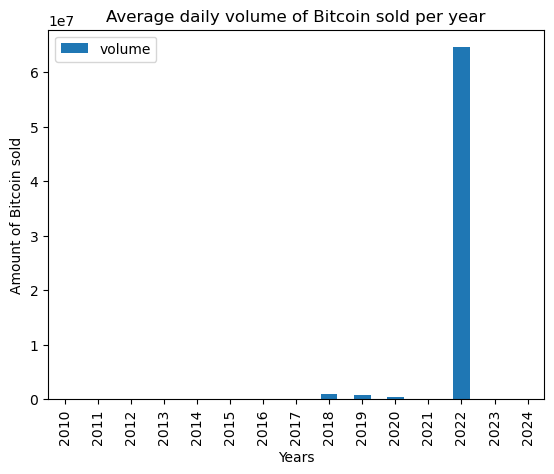

In [139]:
import matplotlib.pyplot as plt
volume_by_year.sort_index().plot(kind="bar")
plt.title('Average daily volume of Bitcoin sold per year')
plt.xlabel('Years')
plt.ylabel('Amount of Bitcoin sold')
plt.show()

In [43]:
# very big volume in 2022 so that in this scale other years are not seen. lets do one more plot without 2022

In [45]:
df_temp = df[df["year"] != 2022]

In [47]:
# lets see volume for all years except 2022
volume_by_year_temp = df_temp.groupby("year").agg({"volume":"mean"}).reset_index()
volume_by_year_temp.set_index("year", inplace=True)
volume_by_year_temp

,volume
year,
2010,15965.359281
2011,37056.810959
2012,55270.508197
2013,49333.756164
2014,12087.706849
2015,75563.961644
2016,53558.751366
2017,102571.920548
2018,946912.671233


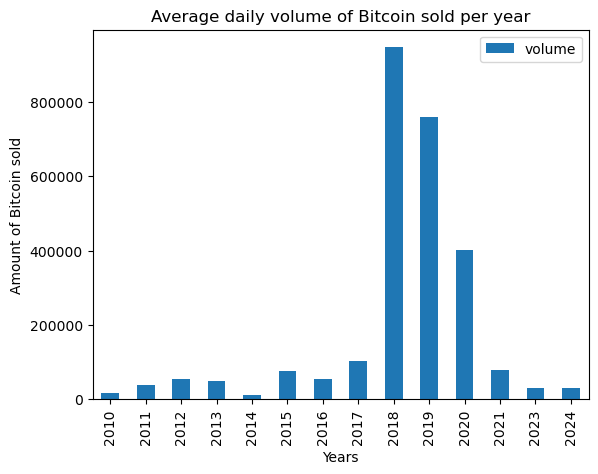

In [141]:
import matplotlib.pyplot as plt
volume_by_year_temp.sort_index().plot(kind="bar")
plt.title('Average daily volume of Bitcoin sold per year')
plt.xlabel('Years')
plt.ylabel('Amount of Bitcoin sold')
plt.show()

In [51]:
# Market analysis 2: The average closing price of Bitcoin over the last 14 years

In [53]:
closing_price_by_year = df.groupby("year").agg({"close":"mean"}).reset_index()
closing_price_by_year.set_index("year", inplace=True)
closing_price_by_year

,close
year,
2010,0.158683
2011,5.644658
2012,8.291803
2013,200.149041
2014,522.891233
2015,272.024110
2016,566.997814
2017,3981.072329
2018,7552.158356


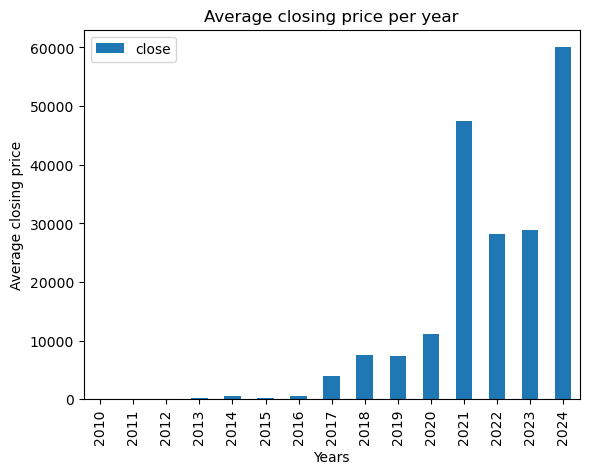

In [55]:
import matplotlib.pyplot as plt
closing_price_by_year.sort_index().plot(kind="bar")
plt.title('Average closing price per year')
plt.xlabel('Years')
plt.ylabel('Average closing price')
plt.show()

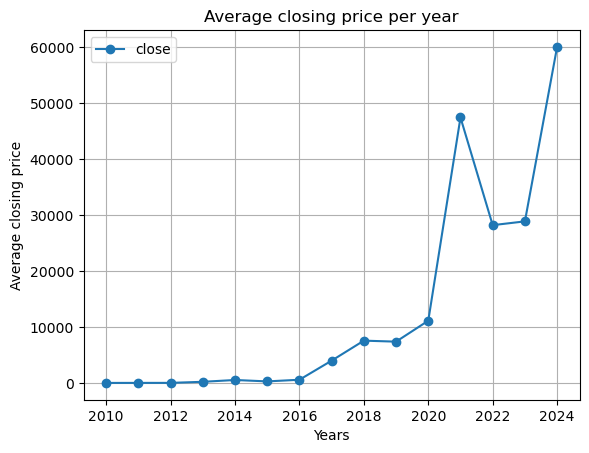

In [57]:
import matplotlib.pyplot as plt

closing_price_by_year.sort_index().plot(kind="line", marker="o")  # Adding markers to highlight yearly data points
plt.title('Average closing price per year')
plt.xlabel('Years')
plt.ylabel('Average closing price')
plt.grid(True)  # Optional: Add a grid for better readability
plt.show()

In [59]:
# Hypothesis 1: The average closing price of Bitcoin is higher in a specific season

In [61]:
# Extract year, month, and day from the 'time' column
df['month'] = df['date'].dt.month

from bitcoin_codefile import get_season

# Apply the function to the DataFrame
df['season'] = df['month'].apply(get_season)


print(df[['date', 'close', 'season']].head())


        date  close  season
0 2010-07-18    0.1  Summer
1 2010-07-19    0.1  Summer
2 2010-07-20    0.1  Summer
3 2010-07-21    0.1  Summer
4 2010-07-22    0.1  Summer


In [63]:
# Group the data by season and calculate the average closing price
seasonal_avg_price = df.groupby('season')['close'].mean()

print(seasonal_avg_price)


season
Autumn    11007.943500
Spring    14925.228346
Summer    12754.212476
Winter    12139.960411
Name: close, dtype: float64


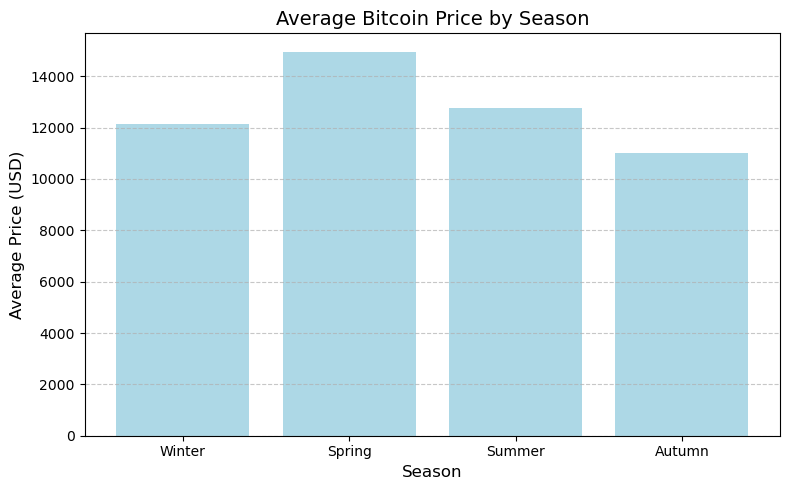

In [65]:
import matplotlib.pyplot as plt

# Sort the seasons in order: Winter, Spring, Summer, Autumn
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_avg_price = seasonal_avg_price.reindex(season_order)

# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(seasonal_avg_price.index, seasonal_avg_price.values, color=['lightblue', 'lightblue', 'lightblue', 'lightblue'])
plt.title('Average Bitcoin Price by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
#plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

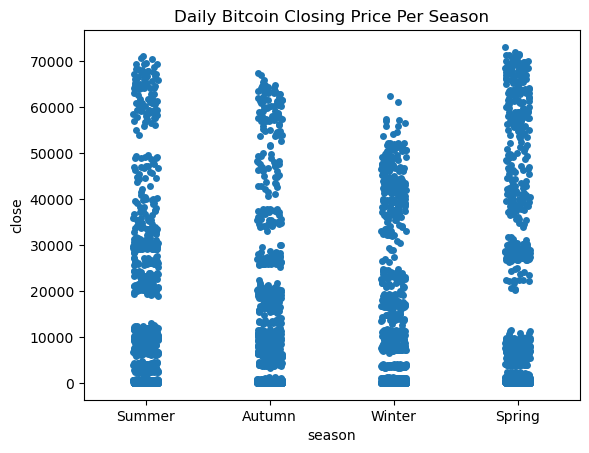

In [67]:
import seaborn as sns
sns.stripplot(x='season', y='close', data=df)
plt.title("Daily Bitcoin Closing Price Per Season")
plt.show()

In [68]:
# Hypothesis 2: Does Bitcoin’s daily trading volume correlate with daily price volatility (difference between high and low prices)?

In [71]:
df["volatility"] = df["high"]-df["low"]

In [73]:
df.head()

,date,high,low,open,volume,volumeto,close,year,month,season,volatility
0,2010-07-18,0.1,0.1,0.0,75.0,NaN,0.1,2010,7,Summer,0.0
1,2010-07-19,0.1,0.1,0.1,574.0,NaN,0.1,2010,7,Summer,0.0
2,2010-07-20,0.1,0.1,0.1,262.0,NaN,0.1,2010,7,Summer,0.0
3,2010-07-21,0.1,0.1,0.1,575.0,NaN,0.1,2010,7,Summer,0.0
4,2010-07-22,0.1,0.1,0.1,2160.0,NaN,0.1,2010,7,Summer,0.0


In [75]:
from scipy import stats
corr, p_value = stats.pearsonr(df["volume"], df["volatility"])

print("Correlation coefficient:", corr)
print("P-value:", p_value)

Correlation coefficient: 0.0670986614071695
P-value: 1.3257459071551451e-06


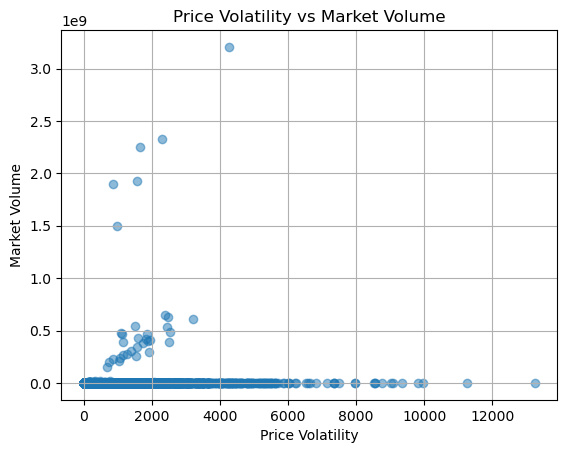

In [77]:
import matplotlib.pyplot as plt

plt.scatter(df["volatility"], df["volume"], alpha=0.5)  # Swapped columns
plt.title("Price Volatility vs Market Volume")
plt.xlabel("Price Volatility")  # Volatility on the x-axis
plt.ylabel("Market Volume")  # Market value on the y-axis
plt.grid(True)
plt.show()

In [79]:
#Lets make the same correlation but ignoring 2022

In [81]:
df_temp["volatility"] = df_temp["high"]-df_temp["low"]

/var/folders/9j/j2dm442d3jgc5620m21l3c080000gn/T/ipykernel_9632/2689497654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["volatility"] = df_temp["high"]-df_temp["low"]


In [83]:
from scipy import stats
corr, p_value = stats.pearsonr(df_temp["volume"], df_temp["volatility"])

print("Correlation coefficient:", corr)
print("P-value:", p_value)

Correlation coefficient: -0.019862302350143173
P-value: 0.1679740338359489


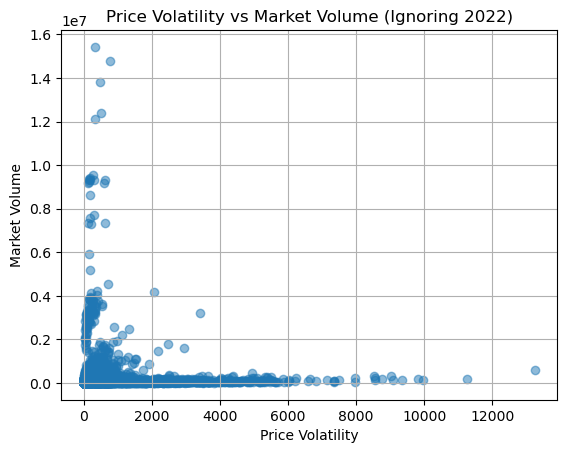

In [85]:
import matplotlib.pyplot as plt

plt.scatter(df_temp["volatility"], df_temp["volume"], alpha=0.5)  # Swapped columns
plt.title("Price Volatility vs Market Volume (Ignoring 2022)")
plt.xlabel("Price Volatility")  # Volatility on the x-axis
plt.ylabel("Market Volume")  # Market value on the y-axis
plt.grid(True)
plt.show()

In [87]:
# Additionally, We tested if Price Movement and Volume correlate

In [89]:
df['price_movement'] = abs(df['close'] - df['open'])

In [91]:
from scipy import stats
corr, p_value = stats.pearsonr(df["volume"], df["price_movement"])

print("Correlation coefficient:", corr)
print("P-value:", p_value)

Correlation coefficient: 0.07666504707318923
P-value: 3.2534405276299446e-08


In [93]:
## 3.2500886819254466e-08 = 0.000000032500886819254466

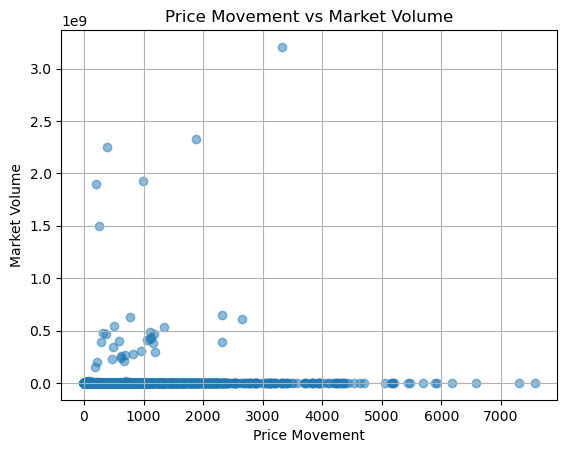

In [95]:
import matplotlib.pyplot as plt
plt.scatter(df["price_movement"], df["volume"], alpha=0.5) 
plt.title("Price Movement vs Market Volume")
plt.xlabel("Price Movement")  
plt.ylabel("Market Volume")  
plt.grid(True)
plt.show()

In [97]:
# One more graph ignoring 2022

In [99]:
df_temp["price_movement"] = abs(df_temp['close'] - df_temp['open'])

/var/folders/9j/j2dm442d3jgc5620m21l3c080000gn/T/ipykernel_9632/849770870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["price_movement"] = abs(df_temp['close'] - df_temp['open'])


In [101]:
from scipy import stats
corr, p_value = stats.pearsonr(df_temp["volume"], df_temp["price_movement"])

print("Correlation coefficient:", corr)
print("P-value:", p_value)

Correlation coefficient: -0.016456583786802946
P-value: 0.25332958283807483


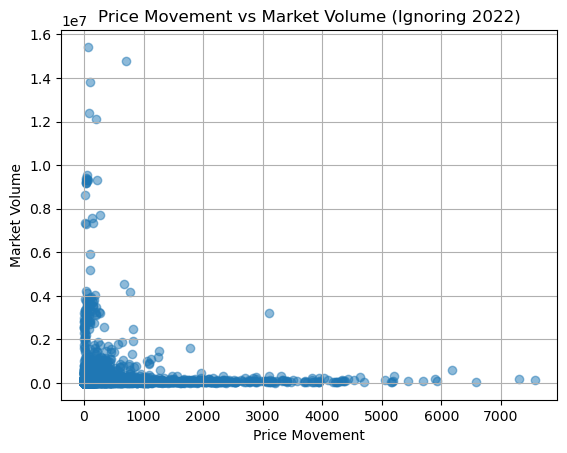

In [103]:
import matplotlib.pyplot as plt
plt.scatter(df_temp["price_movement"], df_temp["volume"], alpha=0.5) 
plt.title("Price Movement vs Market Volume (Ignoring 2022)")
plt.xlabel("Price Movement")  # Volatility on the x-axis
plt.ylabel("Market Volume")  # Market value on the y-axis
plt.grid(True)
plt.show()

In [105]:
# Hypothesis 3: Is an average price of Bitcoin more volatile during weekends compared to weekdays?

df["day_of_week"] = df["date"].dt.weekday  #0-Monday to 6-Sunday

In [107]:
from bitcoin_codefile import day_name

In [109]:
df["day_type"] = df['day_of_week'].apply(day_name)

In [111]:
df.head()

,date,high,low,open,volume,volumeto,close,year,month,season,volatility,price_movement,day_of_week,day_type
0,2010-07-18,0.1,0.1,0.0,75.0,NaN,0.1,2010,7,Summer,0.0,0.1,6,Weekend
1,2010-07-19,0.1,0.1,0.1,574.0,NaN,0.1,2010,7,Summer,0.0,0.0,0,Weekday
2,2010-07-20,0.1,0.1,0.1,262.0,NaN,0.1,2010,7,Summer,0.0,0.0,1,Weekday
3,2010-07-21,0.1,0.1,0.1,575.0,NaN,0.1,2010,7,Summer,0.0,0.0,2,Weekday
4,2010-07-22,0.1,0.1,0.1,2160.0,NaN,0.1,2010,7,Summer,0.0,0.0,3,Weekday


In [113]:
weekday_volatility = df.groupby("day_type").agg({"volatility":"mean"})
weekday_volatility

,volatility
day_type,
Weekday,697.911091
Weekend,482.229406


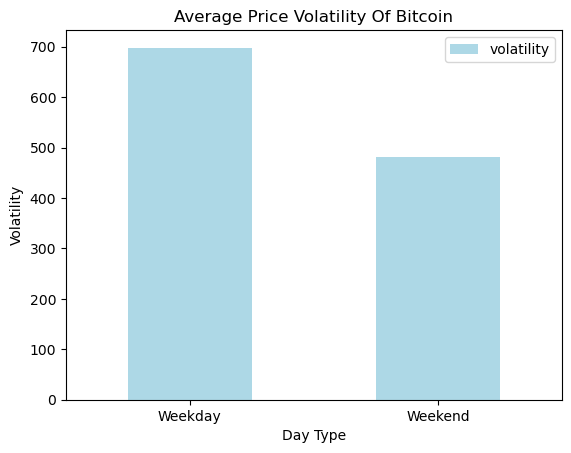

In [144]:
import matplotlib.pyplot as plt
weekday_volatility.sort_index().plot(kind="bar", color=['lightblue', 'lightblue'])
plt.title('Average Price Volatility Of Bitcoin')
plt.xlabel('Day Type')
plt.ylabel('Volatility')
plt.xticks(rotation=0)
plt.show()


In [120]:
weekday_volume = df.groupby("day_type").agg({"volume":"mean"})
weekday_volume

,volume
day_type,
Weekday,4.891350e+06
Weekend,4.335414e+06


In [122]:
with pd.option_context('display.float_format', '{:.2f}'.format):
    display(weekday_volume)

,volume
day_type,
Weekday,4891349.60
Weekend,4335413.64


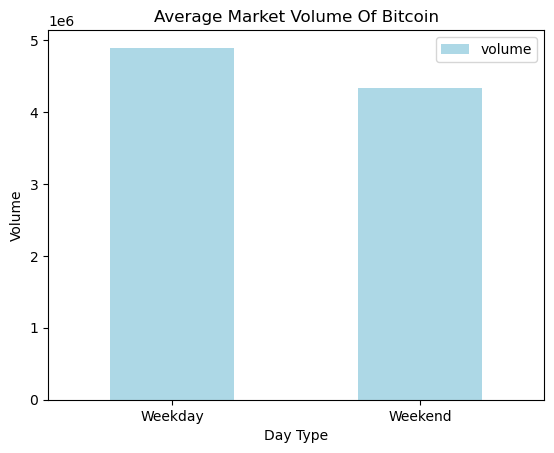

In [124]:
import matplotlib.pyplot as plt
weekday_volume.sort_index().plot(kind="bar", color=['lightblue', 'blue'])
plt.title('Average Market Volume Of Bitcoin')
plt.xlabel('Day Type')
plt.ylabel('Volume')
plt.xticks(rotation=0)
plt.show()


In [126]:
#Hypothesis: Bitcoin Exhibits High Daily Price Volatility
# Calculate daily price volatility
df['daily_volatility'] = df['high'] - df['low']
# Compute standard deviation of the daily volatility
volatility_std = df['daily_volatility'].std()
print(f"Standard Deviation of Daily Price Volatility: {volatility_std:.2f}")

Standard Deviation of Daily Price Volatility: 1141.60


In [128]:
df["volatility"].describe()

count     5185.000000
mean       636.305580
std       1141.603547
min          0.000000
25%          6.900000
50%        115.600000
75%        728.000000
max      13254.900000
Name: volatility, dtype: float64